# Lending Club Case Study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Process Steps

### 1. Importing the loan data
#### The loan data that is relevant for the project is available in loan.csv file. Importing this data to pandas data frame for further analysis

In [2]:
loan_df = pd.read_csv("loan.csv")

### 2. Understanding the loan data
#### Data quality is of prime importance for accurate and meaningful insights. In this step, we are trying to understand the meaning of each attribute, identifying bad records and attribites, and indentifying the irrelevant/inept attributes

In [3]:
print("Info")
loan_df.info()
print("\nRows X Columns")
print(loan_df.shape)
loan_df.head()

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB

Rows X Columns
(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print("\n Description")
loan_df.describe()


 Description


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# Verifying whether there are any duplicates
sum(loan_df.duplicated())

0

In [6]:
# Verifying whether there are any duplicates in the ID column
sum(loan_df.duplicated(['id']))

0

In [7]:
# Finding the null percentage for each column to remove columns which have all the values as NULLs
pd.set_option('display.max_rows', 111)
nullcol = (loan_df.isnull().sum()/len(loan_df)*100)
print('Columns with null value percentage')
print(nullcol)
# Finding the columns that have more than or equal to 60% NULL values
cols_with_60p_nulls=list(nullcol[nullcol>=60].index)
print("\nNumber of columns with more than 60% values as NULL -", len(cols_with_60p_nulls))
print('\n', cols_with_60p_nulls)

Columns with null value percentage
id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title               

In [8]:
# Finding all the columns that have only one unqiue value in it

cols_with_single_vals = []
for col in loan_df:
    if len(loan_df[col].unique())==1:
        cols_with_single_vals.append(col)
print("Number of Columns with only one unique value -", len(cols_with_single_vals))
print('\n', cols_with_single_vals)

Number of Columns with only one unique value - 60

 ['pymnt_plan', 'initial_list_status', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_

In [9]:
# Finding all the columns that have only all values distinct
#If all the values are distinct, then it isn't that useful to extract insights

cols_with_all_distinct_vals = []
for col in loan_df:
    if len(loan_df[col].unique())==len(loan_df) and col != 'id':
        cols_with_all_distinct_vals.append(col)
print("Number of Columns with all distinct values (excluding id column) -", len(cols_with_all_distinct_vals))
print('\n', cols_with_all_distinct_vals)

Number of Columns with all distinct values (excluding id column) - 2

 ['member_id', 'url']


In [10]:
# Doing a sanity check on those columns which have only two distinct values

cols_with_2_distinct_vals = []
for col in loan_df:
    if len(loan_df[col].unique())==2:
        cols_with_2_distinct_vals.append(col)
print("Number of Columns with just two distinct values -", len(cols_with_2_distinct_vals))
print('\n', cols_with_2_distinct_vals)

for col in cols_with_2_distinct_vals:
    print(col, list(loan_df[col].unique()))

Number of Columns with just two distinct values - 4

 ['term', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
term [' 36 months', ' 60 months']
collections_12_mths_ex_med [0.0, nan]
chargeoff_within_12_mths [0.0, nan]
tax_liens [0.0, nan]


In [11]:
#Removing 'terms' column from the cols_with_2_distinct_vals as the values in 'terms' column seems useful for analysis
cols_with_2_distinct_vals.remove("term")
print('Updated cols_with_2_distinct_vals', cols_with_2_distinct_vals)

Updated cols_with_2_distinct_vals ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']


In [12]:
# Columns, including certain customer behavioral that are not useful for the analysis 
# based on data dictionary and business understanding

cols_not_needed = [ 'installment', 'url', 'desc', 'zip_code', 'revol_bal', 'revol_util', 'earliest_cr_line', 
                    'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collection_recovery_fee', 
                    'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'recoveries',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

### 3. Data Cleaning and processing
#### In this step, we are cleaning the data by removing the unwanted and inept columns as well as process/manipulate the data for further analysis and insights

In [13]:
# Dropping the columns with more than 60 percent values as NULL, and the columns with only one unqiue value

del_col = list(set(cols_with_60p_nulls + cols_with_single_vals+ cols_with_all_distinct_vals 
                   + cols_with_2_distinct_vals+ cols_with_2_distinct_vals + cols_not_needed))
print("Total number of columns that can be dropped" , len(del_col))
print('\n', del_col)
semicleansed_data = loan_df.drop(del_col, axis=1)
print("\nShape after column drop", semicleansed_data.shape)

Total number of columns that can be dropped 88

 ['mort_acc', 'total_rev_hi_lim', 'total_pymnt_inv', 'total_bal_ex_mort', 'installment', 'member_id', 'mths_since_recent_inq', 'open_rv_24m', 'mths_since_last_major_derog', 'pymnt_plan', 'last_credit_pull_d', 'max_bal_bc', 'bc_open_to_buy', 'pct_tl_nvr_dlq', 'out_prncp', 'bc_util', 'num_actv_bc_tl', 'il_util', 'tax_liens', 'recoveries', 'collections_12_mths_ex_med', 'mo_sin_old_il_acct', 'delinq_amnt', 'num_il_tl', 'avg_cur_bal', 'inq_last_6mths', 'tot_cur_bal', 'total_rec_int', 'tot_coll_amt', 'num_bc_sats', 'application_type', 'total_bc_limit', 'delinq_2yrs', 'num_sats', 'dti_joint', 'open_rv_12m', 'policy_code', 'num_accts_ever_120_pd', 'num_rev_accts', 'total_rec_prncp', 'total_cu_tl', 'num_op_rev_tl', 'revol_bal', 'chargeoff_within_12_mths', 'open_il_6m', 'open_acc_6m', 'url', 'num_bc_tl', 'initial_list_status', 'verification_status_joint', 'total_pymnt', 'num_tl_90g_dpd_24m', 'mo_sin_old_rev_tl_op', 'zip_code', 'annual_inc_joint', '

In [14]:
# Dropping the rows with 'loan_status' = 'Current' as these rows represent progressing repayment
# These rows won't provide any helpful insights in our analysis
semicleansed_data = semicleansed_data[semicleansed_data['loan_status']!='Current']

In [15]:
# Analysing the values in the columns to understand more and to decide on data type conversions and cleansing

for i in semicleansed_data.columns:
    print(i) 
    print(semicleansed_data[i].unique(), '\n')

id
[1077501 1077430 1077175 ...   90395   90376   87023] 

loan_amnt
[ 5000  2500  2400 10000  7000  3000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000  3500
 12500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750 13650
 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475 22000
  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625 15075
  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125 13200
  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000  4475  6300
  8250  9875 21500  7800  9750 15550  7500  5800  8050  5400  4125  9800
 15700  9900  6250 10200 23000 21250 33425  8125 18800 19200 12875  2625
 11300  4100 18225 18500 16800  2200 14050 10525 19775 14500 11700  4150
 12375  1700 22250 11200 22500 15900  3150  8575  7700 

In [16]:
# Cleaning the 'pub_rec_bankruptcies' columns by filling 'NaN' values with -1

semicleansed_data['funded_amnt_inv'] = semicleansed_data['funded_amnt_inv'].fillna(0.0)
semicleansed_data['annual_inc'] = semicleansed_data['annual_inc'].fillna(0.0)
semicleansed_data['pub_rec_bankruptcies'] = semicleansed_data['pub_rec_bankruptcies'].fillna(-1)

In [17]:
# Coverting the columns like 'funded_amnt_inv', 'annual_inc' and 'dti' to integer columns
for col in ('funded_amnt_inv', 'annual_inc', 'dti', 'pub_rec_bankruptcies'):
    semicleansed_data[col] = semicleansed_data[col].apply(lambda x: int(x))

In [18]:
#Extracting the months values as an integer from the 'term' column
semicleansed_data['term'] = semicleansed_data['term'].apply(lambda term: int(term.split(' ')[1]))

In [19]:
# Cleaning the 'emp_length' column by filling in 'NaN' values with '0 years', and then extracting the numeric value
semicleansed_data['emp_length'] = semicleansed_data['emp_length'].fillna('0 years')
semicleansed_data['emp_length'] = (semicleansed_data['emp_length'].str.extract('(\d+)')).apply(pd.to_numeric)

In [20]:
# Cleaning the 'int_rate' column removing the '%' symbol and converting it a float data type
semicleansed_data['int_rate'] = semicleansed_data['int_rate'].str.replace('%','').apply(pd.to_numeric)

In [21]:
# Creating a shallow copy of the 'semicleansed_data' for further processes
cleansed_data = semicleansed_data[:]
cleansed_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,title,addr_state,dti,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
0,1077501,5000,5000,4975,36,10.65,B,B2,NaN,10,...,Dec-11,Fully Paid,credit_card,Computer,AZ,27,3,0,9,0
1,1077430,2500,2500,2500,60,15.27,C,C4,Ryder,1,...,Dec-11,Charged Off,car,bike,GA,1,3,0,4,0
2,1077175,2400,2400,2400,36,15.96,C,C5,NaN,10,...,Dec-11,Fully Paid,small_business,real estate business,IL,8,2,0,10,0
3,1076863,10000,10000,10000,36,13.49,C,C1,AIR RESOURCES BOARD,10,...,Dec-11,Fully Paid,other,personel,CA,20,10,0,37,0
5,1075269,5000,5000,5000,36,7.90,A,A4,Veolia Transportaton,3,...,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11,9,0,12,0


### 3. Deriving data from existing colums
#### In this step, we try to derive few more columns from existing columns, that may be useful for our analysis

In [22]:
# Deriving the year and month columns from 'issue_d' column
cleansed_data['issue_d'] = pd.to_datetime(cleansed_data['issue_d'], format = '%b-%y')
cleansed_data['issue_year'] = cleansed_data['issue_d'].dt.year
cleansed_data['issue_month'] = cleansed_data['issue_d'].dt.month

In [23]:
# Deriving new category columns by bucketing the values

# Bucketing the loan_amnt
cleansed_data['loan_amnt_bkts'] = pd.cut(cleansed_data['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], labels=['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K'])

# Bucketing the 'annual_inc'
cleansed_data['annual_inc_bkts'] = pd.cut(cleansed_data['annual_inc'], [0, 20000, 40000, 60000, 80000, 100000, 200000, 300000, 1000000], labels=['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K','100K-200K', '200K-300K', '300K+'])

# Bucketing the 'int_rate'
cleansed_data['int_rate_bkts'] = pd.cut(cleansed_data['int_rate'], [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])

# Bucketing the 'dti'
cleansed_data['dti_bkts'] = pd.cut(cleansed_data['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '25-25', '25-30'])

In [24]:
analysis_data = cleansed_data[:]
analysis_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_bkts,annual_inc_bkts,int_rate_bkts,dti_bkts
0,1077501,5000,5000,4975,36,10.65,B,B2,NaN,10,...,3,0,9,0,2011,12,0-5K,20K-40K,10-15,25-30
1,1077430,2500,2500,2500,60,15.27,C,C4,Ryder,1,...,3,0,4,0,2011,12,0-5K,20K-40K,15-20,0-5
2,1077175,2400,2400,2400,36,15.96,C,C5,NaN,10,...,2,0,10,0,2011,12,0-5K,0-20K,15-20,5-10
3,1076863,10000,10000,10000,36,13.49,C,C1,AIR RESOURCES BOARD,10,...,10,0,37,0,2011,12,5K-10K,40K-60K,10-15,15-20
5,1075269,5000,5000,5000,36,7.90,A,A4,Veolia Transportaton,3,...,9,0,12,0,2011,12,0-5K,20K-40K,5-10,10-15


### 4. Data Analysis
#### In this step, we will do various univariate, segmented univariate and bivariate analysis. These analysis will help us to identify the outliers to be excluded, help find correlations and insights

### Univariate Analysis

In [25]:
# Analysing the loan amount column

analysis_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

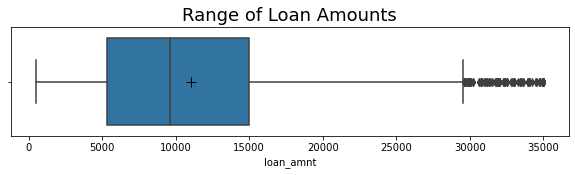

In [26]:
# Plotting the interest rates as a box plot

plt.figure(figsize=(10, 2))
sns.boxplot(x='loan_amnt', data=analysis_data, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Range of Loan Amounts", size=18)
plt.show()

#### It can be inferred from the above plot that majority of loan amounts falls in the range of  ~\\$5K and ~\\$15K with a mean of ~\\$11K

In [27]:
# Analysing the interest rate column

analysis_data['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

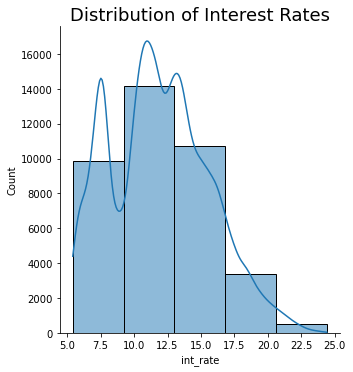

In [28]:
# Plotting the interest rates as a distribution plot

sns.displot(analysis_data['int_rate'], kde = True, bins=5)
plt.title("Distribution of Interest Rates", size=18)
plt.show()

#### Inference from the above plot: majority of loans falls in the interest rate range of ~9% and 14% with mean at ~12%

In [29]:
# Analysing the annual income column

analysis_data['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

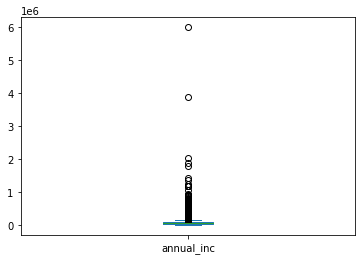

In [30]:
# Plotting the annual income on a box plot

analysis_data['annual_inc'].plot.box()

#### We can see that there are a lot of outliers in the annual income data. Hence, after analysing the above box plot, we can remove the outliers by only considering values till 99.5 percentile

In [31]:
#Removing the outliers from annual income column

annual_inc_qval = analysis_data['annual_inc'].quantile(0.995)
annual_income_analysis_data = analysis_data[analysis_data['annual_inc']<annual_inc_qval]

In [32]:
# Analysing the annual income column after outlier removal

annual_income_analysis_data['annual_inc'].describe()

count     38359.000000
mean      66156.565526
std       37321.343528
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      294000.000000
Name: annual_inc, dtype: float64

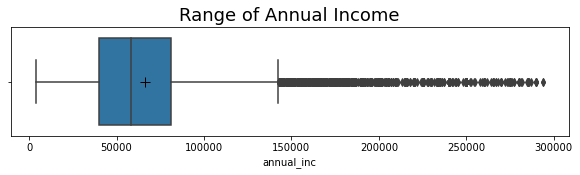

In [33]:
# Plotting the annual income as a box plot after outlier removal

plt.figure(figsize=(10, 2))
sns.boxplot(x='annual_inc', data=annual_income_analysis_data, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Range of Annual Income", size=18)
plt.show()

#### Inference from the above plot: Majority of people who have taken loans falls in annual income range ~\\$40K and ~\\$81K with a mean value of \\$66K

In [34]:
# Analysing the employment length column 

annual_income_analysis_data['emp_length'].describe()

count    38359.000000
mean         4.919237
std          3.451759
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

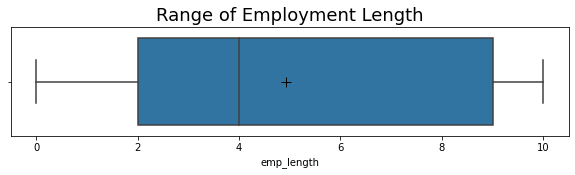

In [35]:
# Plotting the employment length as a box plot

plt.figure(figsize=(10, 2))
sns.boxplot(x='emp_length', data=annual_income_analysis_data, showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title("Range of Employment Length", size=18)
plt.show()

#### Inference from the above plot: Majority of people who have taken loans have an employment length ranging from 2 years to 9 years with a mean value of ~5 years

### Segmented Univariate Analysis

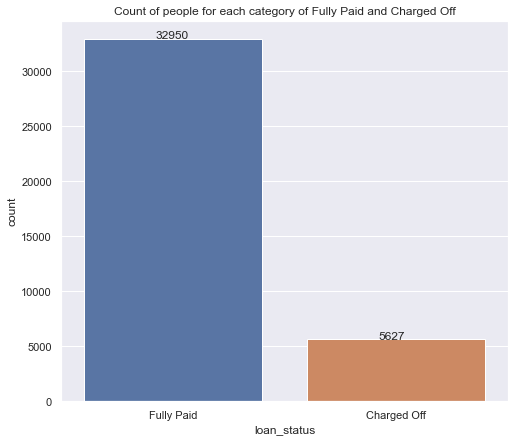

In [36]:
# Plotting the count of people against the 'loan_status' category variable

sns.set(style="darkgrid")
fig, ax = plt.subplots()
width = len(analysis_data['loan_status'].unique()) + 6
fig.set_size_inches(width , 7)
ax = sns.countplot(data = analysis_data, x='loan_status', order=analysis_data['loan_status'].value_counts().index, hue=None) 
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
ax.set(title='Count of people for each category of Fully Paid and Charged Off')
plt.show()

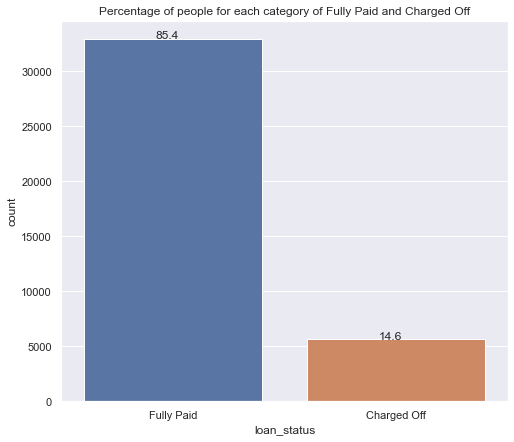

In [37]:
# Plotting the percentage of count of people against the 'loan_status' category variable

sns.set(style="darkgrid")
fig, ax = plt.subplots()
width = len(analysis_data['loan_status'].unique()) + 6
fig.set_size_inches(width , 7)
ax = sns.countplot(data = analysis_data, x='loan_status', order=analysis_data['loan_status'].value_counts().index, hue=None) 
for p in ax.patches:
    ax.annotate(round(p.get_height()/len(analysis_data)*100,1), (p.get_x()+0.32, p.get_height()+20)) 
ax.set(title='Percentage of people for each category of Fully Paid and Charged Off')
plt.show()

#### Inference from the above plot: Only ~15% of loans have not been paid off completely

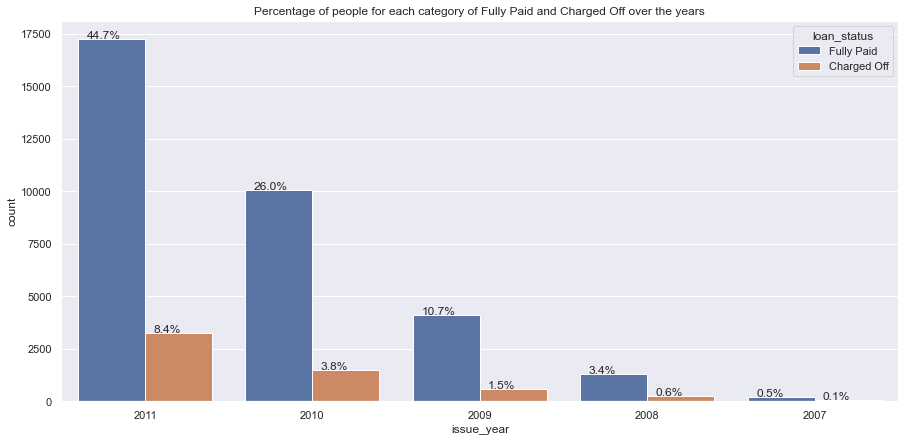

In [38]:
# Plotting the percentage of people against the 'issue_year' category variable

sns.set(style="darkgrid")
var = pd.Series(data = 'loan_status')
fig, ax = plt.subplots()
width = len(analysis_data['issue_year'].unique()) + 6 + 4*len(var.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = analysis_data, x='issue_year', order=analysis_data['issue_year'].value_counts().index, hue='loan_status') 
if len(var.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(analysis_data))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del var
ax.set(title='Percentage of people for each category of Fully Paid and Charged Off over the years')
plt.show()

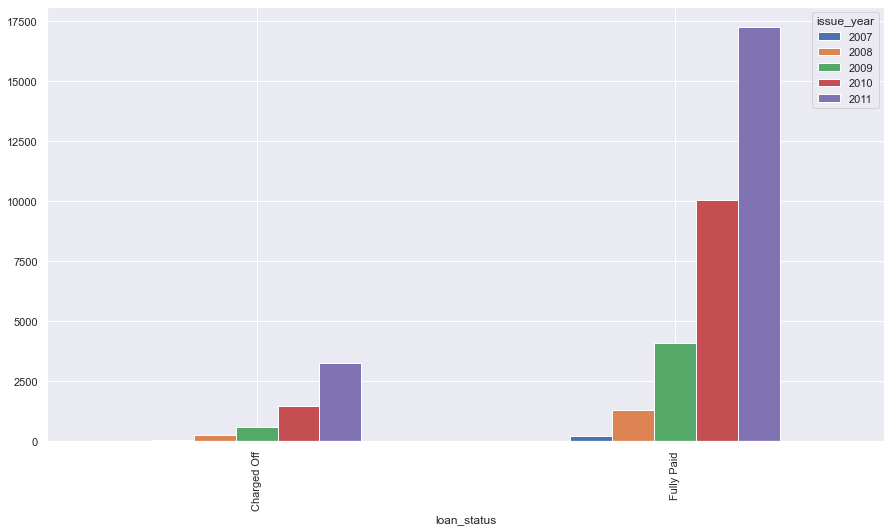

In [39]:
# Plotting the percentage of people against the 'issue_year' category variable

analysis_data.groupby('loan_status')['issue_year'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

#### Inference from the above plot: Starting from 2007 to 2011, the number of loans that were Charged Off and Fully Paid has kept on increasing

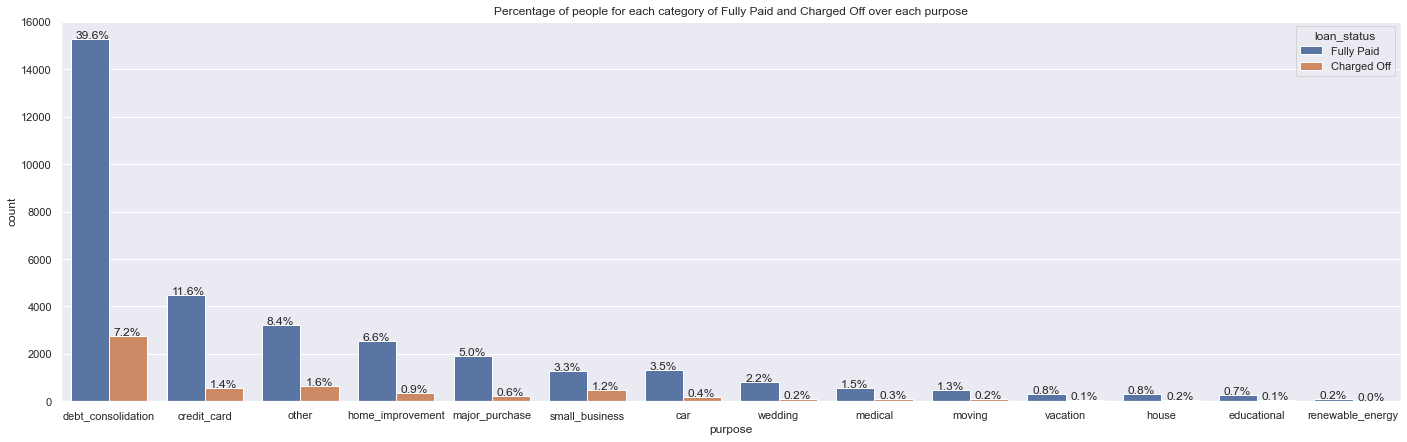

In [40]:
# Plotting the loan status against corresponding Purpose of loan category

sns.set(style="darkgrid")
var = pd.Series(data = 'loan_status')
fig, ax = plt.subplots()
width = len(analysis_data['purpose'].unique()) + 6 + 4*len(var.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = analysis_data, x='purpose', order=analysis_data['purpose'].value_counts().index, hue='loan_status') 
if len(var.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(analysis_data))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del var
ax.set(title='Percentage of people for each category of Fully Paid and Charged Off over each purpose')
plt.show()

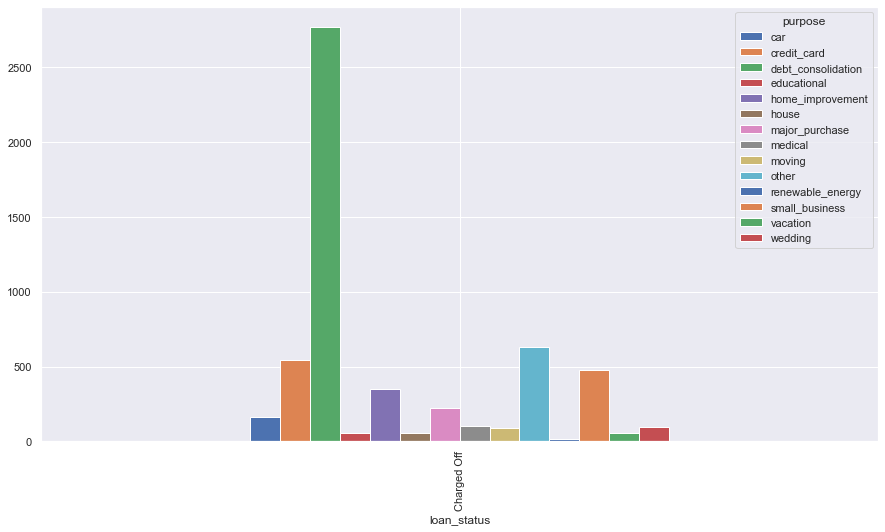

In [41]:
# Plotting the Charged Off loan count against corresponding Purpose of loan category

analysis_data[analysis_data['loan_status']=='Charged Off'].groupby('loan_status')['purpose'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

#### Inference from the above two plots:The major purpose behind people taking loan is Debt consolidation and also, among the loans that are Charged Off, Debt Consolidation comes out to be of high majority

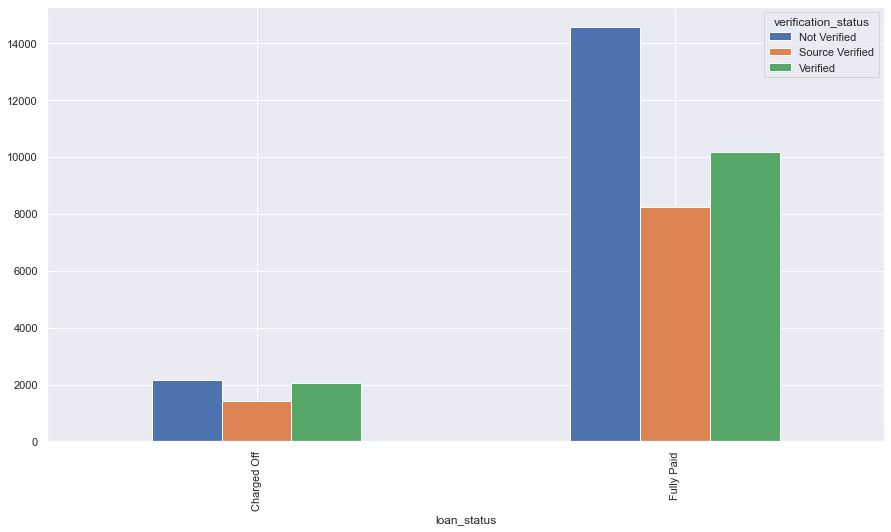

In [42]:
# Plotting loan status against verification status 

analysis_data.groupby('loan_status')['verification_status'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

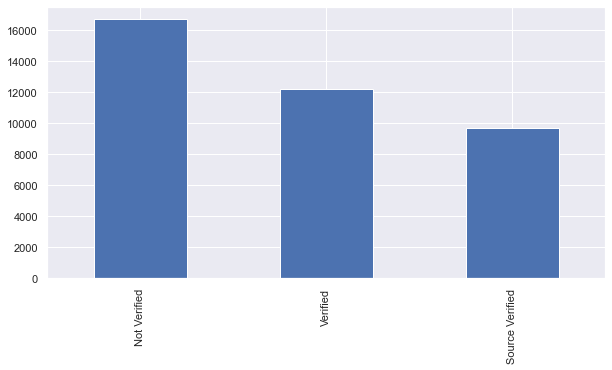

In [43]:
# Plotting verification status for overall data 

analysis_data['verification_status'].value_counts().plot(kind='bar', figsize=[10,5])
plt.show()

#### Inference from the above two plots: Be it Charged Off or Fully Paid, the verification status - Not Verified is the highest, meaning verification process has to be improved

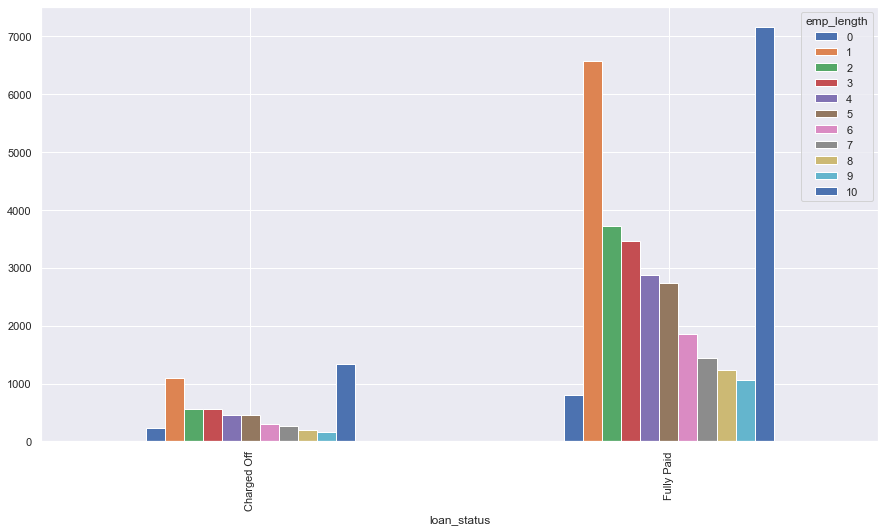

In [44]:
# Plotting Employement length against loan status

analysis_data.groupby('loan_status')['emp_length'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

#### The above plot shows that most of the applicants employment length is either 10+ years and 1 year in both categories

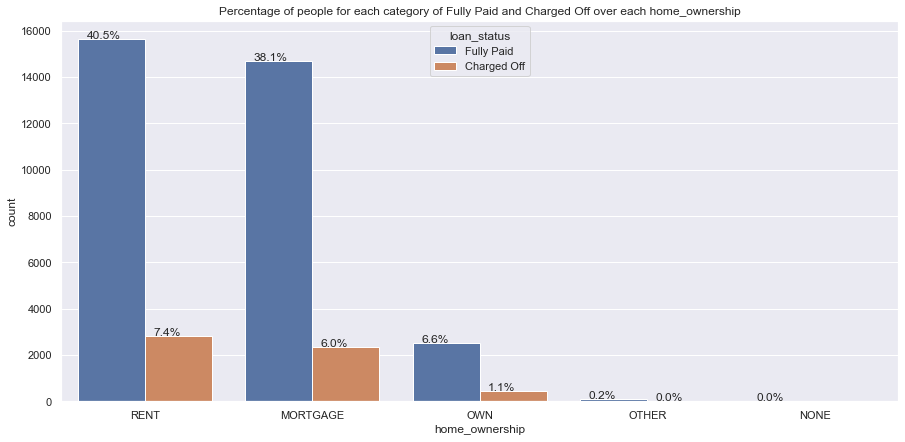

In [45]:
# Plotting home ownership against loan status categories

sns.set(style="darkgrid")
var = pd.Series(data = 'loan_status')
fig, ax = plt.subplots()
width = len(analysis_data['home_ownership'].unique()) + 6 + 4*len(var.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = analysis_data, x='home_ownership', order=analysis_data['home_ownership'].value_counts().index, hue='loan_status') 
if len(var.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(analysis_data))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del var
ax.set(title='Percentage of people for each category of Fully Paid and Charged Off over each home_ownership')
plt.show()

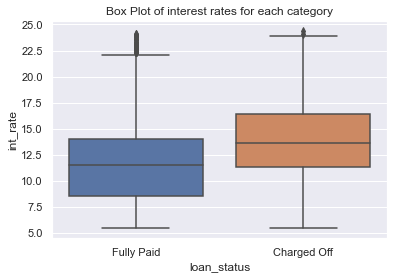

In [46]:
# Interest rates against status categories

ax = sns.boxplot(x = 'loan_status', y = 'int_rate', data = analysis_data)
ax.set(title='Box Plot of interest rates for each category')
plt.show()

#### Inference from the above plot : As the rate increases, the chances of Charged Off increases

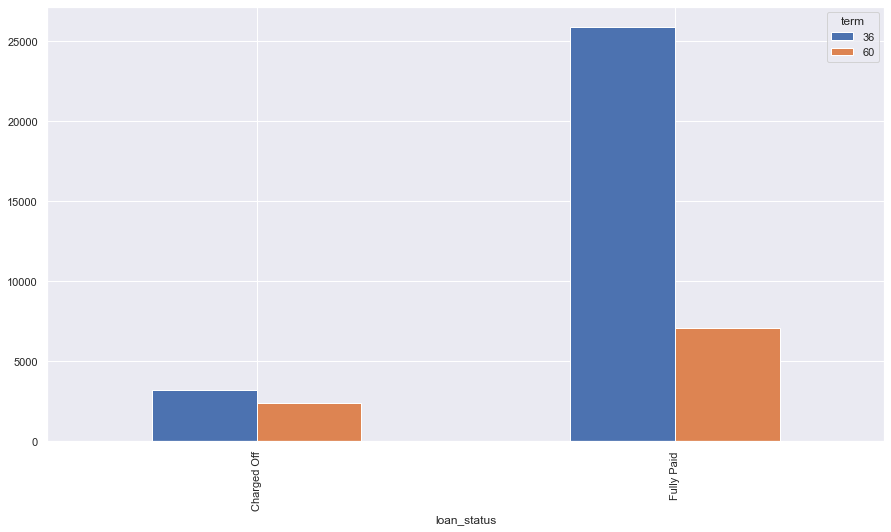

In [47]:
# Analysis on loan term

analysis_data.groupby('loan_status')['term'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

#### Inference: 36 months term is preferred over 60 months term

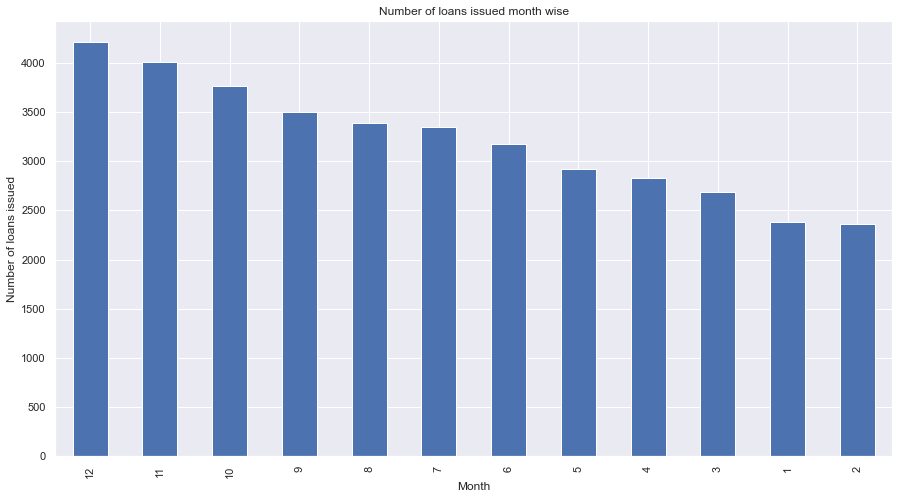

In [48]:
# Analysis on loans issued month wise

plt.title('Number of loans issued month wise')
plt.xlabel('Month')
plt.ylabel('Number of loans issued')
analysis_data['issue_month'].value_counts().plot(kind='bar', figsize=[15,8])
plt.show()

#### Inference : 12th month - December month is when the highest number of loans are issued. This could be because of the festive season shopping and holiday season vacations

### Bivariate Analysis

In [49]:
# Bivariate analysis on Annual Income

ratio_wise = analysis_data.pivot_table(index='annual_inc_bkts', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise

loan_status,annual_inc_bkts,Charged Off,Fully Paid,Total,Charged Off Ratio
0,0-20K,237,943,1180,20.084746
1,20K-40K,1514,7004,8518,17.774125
2,40K-60K,1729,9534,11263,15.351150
3,60K-80K,1024,6597,7621,13.436557
4,80K-100K,531,3983,4514,11.763403
5,100K-200K,532,4379,4911,10.832824
6,200K-300K,39,360,399,9.774436
7,300K+,20,137,157,12.738854


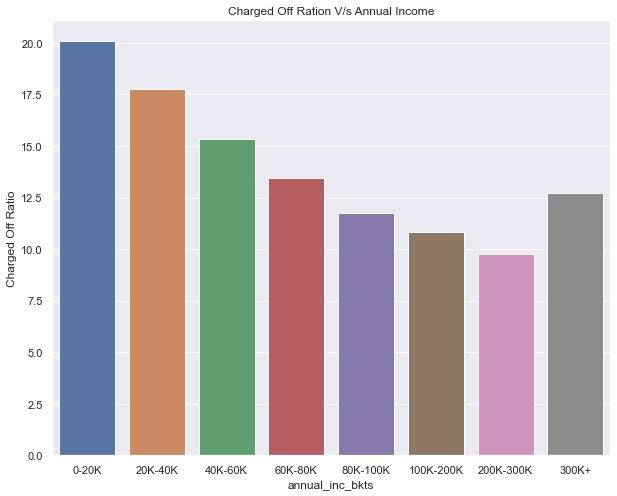

In [50]:
# Plotting ratio range against annual income buckets

plt.figure(figsize=[10,8])
plt.title('Charged Off Ration V/s Annual Income')
sns.barplot(x = ratio_wise['annual_inc_bkts'], y= ratio_wise['Charged Off Ratio'])
plt.show()

#### Inference : Charged Off ratio generally tends to decrease as the annual income range increases

In [51]:
# Bivariate analysis on Purpose

ratio_wise = analysis_data.pivot_table(index='purpose', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Charged Off Ratio
11,small_business,475,1279,1754,27.080958
10,renewable_energy,19,83,102,18.627451
3,educational,56,269,325,17.230769
9,other,633,3232,3865,16.377749
5,house,59,308,367,16.076294
8,moving,92,484,576,15.972222
7,medical,106,575,681,15.565345
2,debt_consolidation,2767,15288,18055,15.325395
12,vacation,53,322,375,14.133333
4,home_improvement,347,2528,2875,12.069565


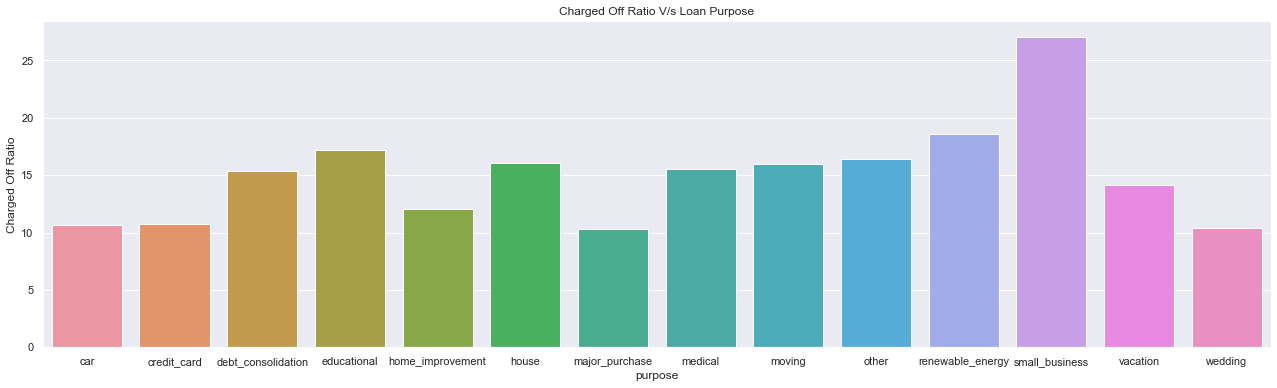

In [52]:
# Plotting ratio v/s purpose

plt.figure(figsize=[22,6])
plt.title('Charged Off Ratio V/s Loan Purpose')
sns.barplot(x=ratio_wise['purpose'], y=ratio_wise['Charged Off Ratio'])
plt.show()

#### Inference : Charged Off ratio is highest for Small business loan purpose

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

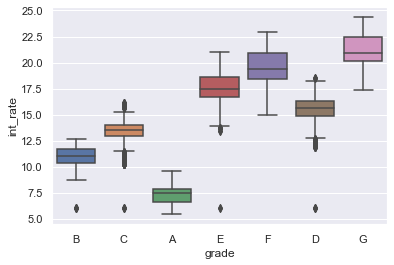

In [53]:
# Plotting Grades v/s Interest rates

sns.boxplot(x = 'grade', y = 'int_rate', data = analysis_data)

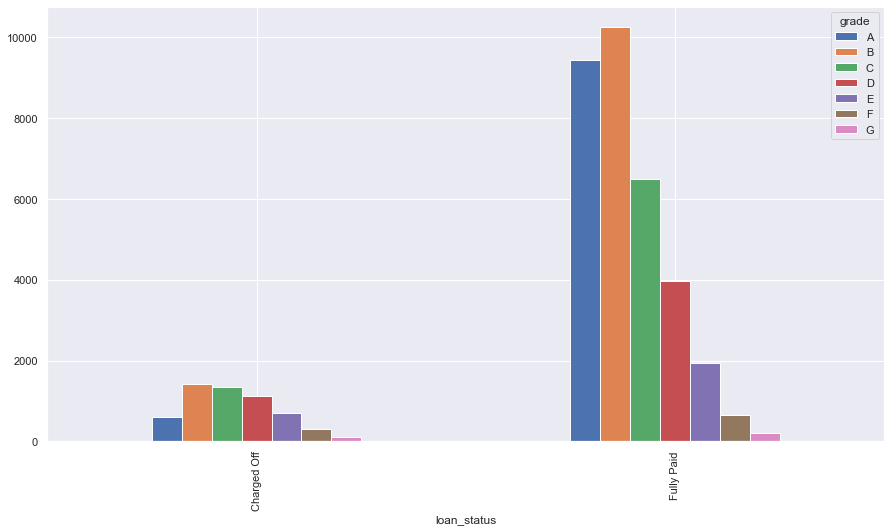

In [54]:
# Plotting loan counts for each grade for each loan status

analysis_data.groupby('loan_status')['grade'].value_counts().unstack().plot(kind='bar', figsize=[15,8])
plt.show()

In [55]:
# Bivariate analysis on Grade

ratio_wise = analysis_data.pivot_table(index='grade', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Charged Off Ratio
6,G,101,198,299,33.779264
5,F,319,657,976,32.684426
4,E,715,1948,2663,26.849418
3,D,1118,3967,5085,21.986234
2,C,1347,6487,7834,17.194281
1,B,1425,10250,11675,12.205567
0,A,602,9443,10045,5.993031


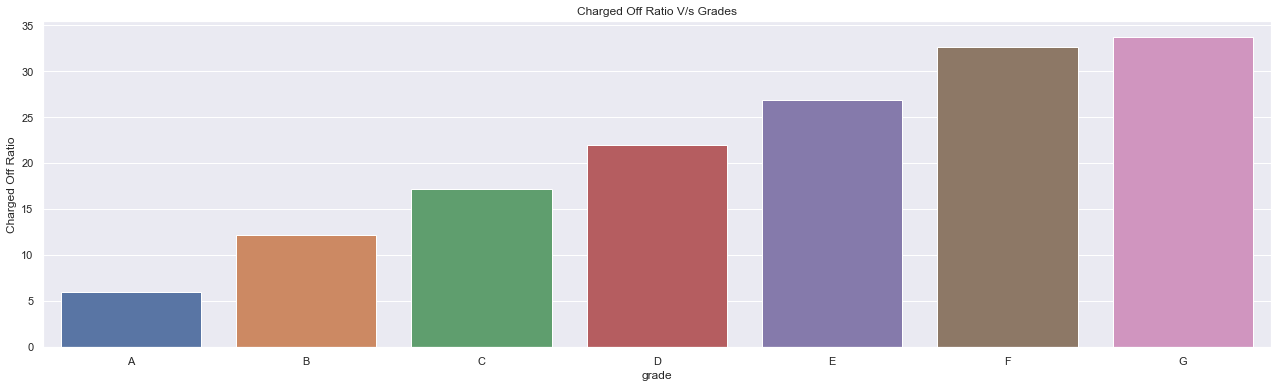

In [56]:
# Plotting Ratio v/s Grade

plt.figure(figsize=[22,6])
plt.title('Charged Off Ratio V/s Grades')
sns.barplot(x=ratio_wise['grade'], y=ratio_wise['Charged Off Ratio'])
plt.show()

#### Inference from the above 3 plots: As the grades moves from A to G, the interest rates increases, the charged off ratio increases. This means that, as the interest rates increases, the chances of charge off increases, and hence Grade A loans are better for the loan provider

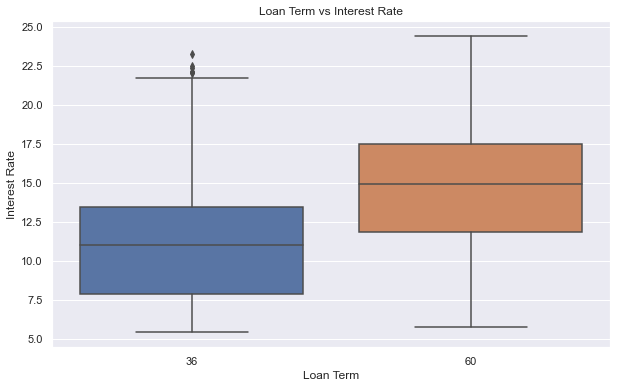

In [57]:
# Loan term vs interest rate
plt.figure(figsize=[10,6])
ax = sns.boxplot(x = analysis_data['term'], y=analysis_data['int_rate'])
ax.set(xlabel='Loan Term', ylabel='Interest Rate', title="Loan Term vs Interest Rate")
plt.show()

#### Inference : Interest rates are generally higher for 60 months term loans than 36 months terms. This also validates the reason for preference for 36 months term loans over 60 months term loans

In [58]:
# Bivariate analysis on Bankruptcies

ratio_wise = analysis_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Charged Off Ratio
3,2,2,3,5,40.000000
2,1,366,1271,1637,22.357972
0,-1,118,579,697,16.929699
1,0,5141,31097,36238,14.186765


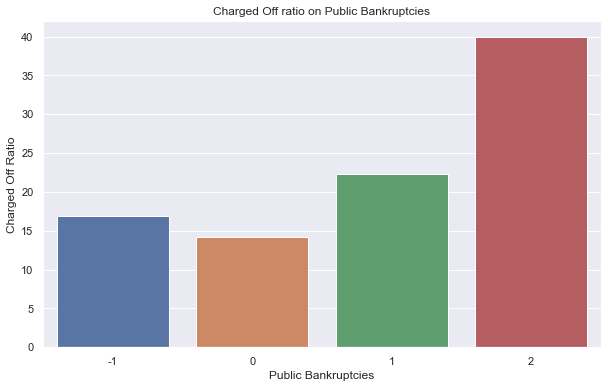

In [59]:
# Plotting the ration v/s bankruptcies

plt.figure(figsize=[10,6])
ax = sns.barplot(x=ratio_wise['pub_rec_bankruptcies'], y=ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Public Bankruptcies', ylabel='Charged Off Ratio', title="Charged Off ratio on Public Bankruptcies")
plt.show()

#### Inference: History of bankruptcy is good indicator of the borrowers chances of Charged Off

In [60]:
# Bivariate analysis on Public Records 

ratio_wise = analysis_data.pivot_table(index='pub_rec', columns='loan_status',
                              values='id', aggfunc=len).reset_index()

ratio_wise['Total'] = ratio_wise['Charged Off'] + ratio_wise['Fully Paid']
ratio_wise['Charged Off Ratio'] = (ratio_wise['Charged Off'] * 100)/ratio_wise['Total']
ratio_wise.sort_values(by='Charged Off Ratio', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Charged Off Ratio
1,1,457.0,1556.0,2013.0,22.702434
2,2,10.0,38.0,48.0,20.833333
0,0,5160.0,31347.0,36507.0,14.134276
3,3,NaN,7.0,NaN,NaN
4,4,NaN,2.0,NaN,NaN


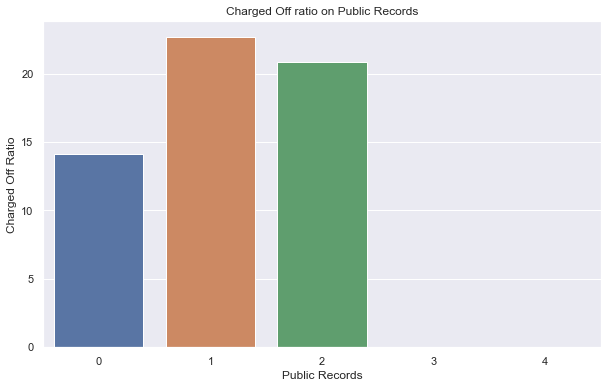

In [61]:


plt.figure(figsize=[10,6])
ax = sns.barplot(x=ratio_wise['pub_rec'], y=ratio_wise['Charged Off Ratio'], data=ratio_wise)
ax.set(xlabel='Public Records', ylabel='Charged Off Ratio', title="Charged Off ratio on Public Records")
plt.show()

#### Inference: History of derogatory public record is good indicator of the borrowers chances of Charged Off

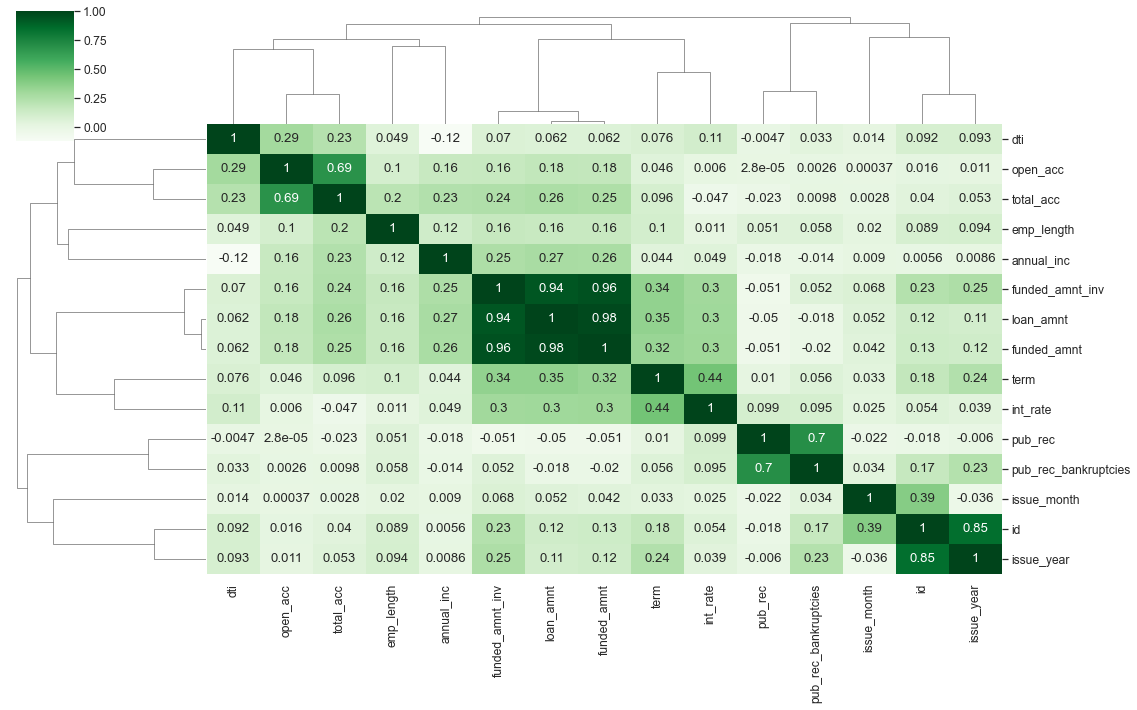

In [62]:
# Correlation matrix

corr = analysis_data.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(16, 10), cmap="Greens")
plt.show()

#### Inference - Negative correlation between dti and annual income. This means if the annual income is more, the dti is less